# ePPR - extended Projection Pursuit Regression
# $$\hat{y}_i=\bar{y}+\sum_{d=0}^D\sum_{m=1}^{M_d}\beta_{m,d}\phi_{m,d}(\alpha_{m,d}^Tx_{i-d})$$
# with    $\frac{1}{n}\sum_{i=1}^n\phi_{m,d}(\alpha_{m,d}^Tx_{i-d})=0$,    $\frac{1}{n}\sum_{i=1}^n\phi_{m,d}^2(\alpha_{m,d}^Tx_{i-d})=1$
# by minimizing    $f=\sum_{i=1}^n(y_i-\hat{y}(x_i))^2+\lambda\sum_{d=0}^D\sum_{m=1}^{M_d}\Vert{L\alpha_{m,d}}\Vert^2$
___
### References
Rapela, J., Felsen, G., Touryan, J., Mendel, J. M. & Grzywacz, N. M. ePPR: a new strategy for the characterization of sensory cells from input/output data. Network: Computation in Neural Systems 21, 35–90 (2010).

Friedman J, Stuetzle W. Projection pursuit regression. Journal of the American Statistical
Association 76(376):817–823 (1981).
___

## Test Data
#### X: Natural Images
#### Y: Simulated Neuron with MFR=0.56, MIF=4.26

In [1]:
using FileIO
d=load("./data.jld");x=d["x"];y=d["y"];imagesize=(16,16);

Interact.Slider{Int64}(7: "input-2" = 12000 Int64 , "", 12000, 1:24000, "horizontal", true, "d", true)

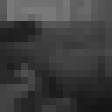

"y = 5"

In [3]:
using ePPR,Images,Interact
i = slider(1:size(x,1))
xvalue = map(j->colorview(Gray,reshape(x[j,:]/255,imagesize...)),signal(i))
yvalue = map(j->"y = $(y[j])",signal(i))
display.([i,xvalue,yvalue]);

## ePPR with Linear Time Interaction

In [4]:
hp=ePPRHyperParams(imagesize...)
hp.lambda = 15
hp.nft = [4,4,4]
debug = ePPRDebugOptions(DebugVisual)
model,models = epprcv(x,y,hp,debug);

Cross Validation Data Partition: n = 24000, ntrain = 21600 in 5-fold, ntrainfold = 4320 in 8-fold, ntest = 2400 in 8-fold
ePPR Forward Stepwise ...
Fit [Temporal-0, Spatial-1] New Term ...
Get Initial α ...
New Term 1th iteration. TermLoss: 11480.307498170694, PenaltyLoss: 150.98669475309808.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.1552451379510524
                                 step is λ = 0
New Term 2th iteration. TermLoss: 11162.496087598443, PenaltyLoss: 57.43202224258078.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.684712070848712
                                 step is λ = 0
New Term 3th iteration. TermLoss: 10971.395867013267, PenaltyLoss: 57.674779321072286.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.7983968468347613
                                 step is λ = 0
New Term 4th iteration. TermLoss: 10756.52859405501, PenaltyLoss: 60.603091539757166.
NewtonTrustRegio

New Term 3th iteration. TermLoss: 7927.033029727931, PenaltyLoss: 26.55608948624251.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.2902527171036424
                                 step is λ = 0
New Term 4th iteration. TermLoss: 7801.331011297302, PenaltyLoss: 47.485967848136156.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.8874101512811889
                                 step is λ = 0
New Term 5th iteration. TermLoss: 7775.028068195408, PenaltyLoss: 67.96404784518215.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.6771348126879029
                                 step is λ = 0
New Term converged in 5 iterations with (lossₒ-lossₙ)/lossₒ = 0.0015960117178443595.
Fit [Temporal-2, Spatial-2] New Term ...
Get Initial α ...
New Term 1th iteration. TermLoss: 7752.823983515852, PenaltyLoss: 136.9384983412013.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.984

New Term 2th iteration. TermLoss: 7582.869642820694, PenaltyLoss: 36.704081181064325.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.12185355836536653
                                 step is λ = 0
NewtonTrustRegion 2th iteration, r = 0.25
                                 ρ = 0.1390298299709371
                                 step is easy
NewtonTrustRegion 3th iteration, r = 0.0625
                                 ρ = 0.8354617421437354
                                 step is easy
New Term 3th iteration. TermLoss: 7574.4003133084625, PenaltyLoss: 36.56420446925566.
NewtonTrustRegion 1th iteration, r = 0.125
                                 ρ = 1.0221526056248342
                                 step is easy
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.0006346298060591714.
Refit [Temporal-1, Spatial-3] New Term ...
New Term 1th iteration. TermLoss: 7530.112646025602, PenaltyLoss: 43.46497668329657.
NewtonTrustRegion 1th iteration, r 

NewtonTrustRegion 1th iteration, r = 0.0625
                                 ρ = 0.2120611263901716
                                 step is easy
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 9.481460894670848e-5.
ePPR Backward Stepwise ...
Drop Term: [temporal-2, spatial-3] with β: 0.02946259414989827.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.354437, 0.117069, 0.217139, 0.0685718, 0.33108, 0.103913, 0.199795, 0.0756996, 0.263813, 0.0421441, 0.0335508]
New βs: [0.367659, 0.135118, 0.234968, 0.0900366, 0.347302, 0.114509, 0.221617, 0.0946951, 0.273872, 0.0380492, 0.0411064]
Refit [Temporal-0, Spatial-1] New Term ...
New Term 1th iteration. TermLoss: 7478.6805774046825, PenaltyLoss: 62.58165872343599.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.98134386139961
                                 step is λ = 0
New Term 2th iteration. TermLoss: 7478.616542859166, PenaltyLoss: 62.1051522937116.
NewtonTrustRegion 1th iteration, r = 1.

NewtonTrustRegion 1th iteration, r = 0.015625
                                 ρ = 0.9776254873727763
                                 step is easy
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 0.00010212214397002272.
Drop Term: [temporal-2, spatial-2] with β: 0.03824074796086231.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.367659, 0.12743, 0.234968, 0.0936768, 0.32666, 0.107896, 0.21707, 0.0937831, 0.273872, 0.0388158]
New βs: [0.376776, 0.157709, 0.23856, 0.124072, 0.351175, 0.129466, 0.237092, 0.119261, 0.269378, 0.0539982]
Refit [Temporal-0, Spatial-1] New Term ...
New Term 1th iteration. TermLoss: 7440.257770953872, PenaltyLoss: 62.58165872343599.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9706354101313638
                                 step is λ = 0
New Term 2th iteration. TermLoss: 7441.253316554576, PenaltyLoss: 60.91373916426446.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9824554

NewtonTrustRegion 1th iteration, r = 0.03125
                                 ρ = 0.7910036142109362
                                 step is easy
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 0.00015729592584095228.
Drop Term: [temporal-2, spatial-4] with β: 0.04280664986078876.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.376776, 0.149823, 0.23856, 0.124072, 0.351175, 0.129466, 0.237092, 0.113656, 0.269378]
New βs: [0.379249, 0.183212, 0.24197, 0.157527, 0.36298, 0.128409, 0.238473, 0.127227, 0.280221]
Refit [Temporal-0, Spatial-1] New Term ...
New Term 1th iteration. TermLoss: 7458.071291683769, PenaltyLoss: 62.58165872343599.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9658565297336487
                                 step is λ = 0
New Term 2th iteration. TermLoss: 7458.860083246968, PenaltyLoss: 60.98097873179139.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9827211070989179
              

NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.6581550619389049
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.00061824376182641.
Model Loss increased from 7816.381336499832 to 7884.927007039758. Discard the new term, keep the old one.
Drop Term: [temporal-1, spatial-2] with β: 0.10103614000860417.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.379249, 0.183212, 0.24197, 0.153028, 0.36298, 0.238473, 0.120102, 0.280221]
New βs: [0.380845, 0.214703, 0.239479, 0.182416, 0.383442, 0.251955, 0.12931, 0.282773]
Refit [Temporal-0, Spatial-1] New Term ...
New Term 1th iteration. TermLoss: 7583.953064695327, PenaltyLoss: 62.58165872343599.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9685312312698424
                                 step is λ = 0
New Term 2th iteration. TermLoss: 7584.910111485628, PenaltyLoss: 60.54768769319672.
NewtonTrustRegion 1th iteration

NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.6592962332856493
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.0006235674519719064.
Model Loss increased from 7890.937468304222 to 7959.760714197086. Discard the new term, keep the old one.
Drop Term: [temporal-1, spatial-4] with β: 0.11705853199055838.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.380845, 0.214703, 0.239479, 0.177076, 0.36076, 0.237384, 0.282773]
New βs: [0.379483, 0.239528, 0.239617, 0.203863, 0.314355, 0.234907, 0.283512]
Refit [Temporal-0, Spatial-1] New Term ...
New Term 1th iteration. TermLoss: 7663.036738504032, PenaltyLoss: 62.58165872343599.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.967001173808847
                                 step is λ = 0
New Term 2th iteration. TermLoss: 7663.460971859277, PenaltyLoss: 60.62274704008949.
NewtonTrustRegion 1th iteration, r = 1.0
       

NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.6446533749895149
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.0006106345705213841.
Model Loss increased from 7941.992176448044 to 8011.181791071929. Discard the new term, keep the old one.
Drop Term: [temporal-0, spatial-4] with β: 0.20386348384357203.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.379483, 0.239528, 0.239617, 0.300177, 0.226031, 0.283512]
New βs: [0.362515, 0.0639126, 0.235759, 0.326067, 0.240543, 0.283063]
Refit [Temporal-0, Spatial-1] New Term ...
New Term 1th iteration. TermLoss: 7675.507358800804, PenaltyLoss: 62.58165872343599.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.8767388468973106
                                 step is λ = 0
New Term 2th iteration. TermLoss: 7665.668156303131, PenaltyLoss: 66.17453001560814.
NewtonTrustRegion 1th iteration, r = 1.0
                        

NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.630667466631192
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.0006064482775432876.
Model Loss increased from 7983.708805549401 to 8052.902476582334. Discard the new term, keep the old one.
Drop Term: [temporal-0, spatial-2] with β: 0.07303083886992806.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.339944, 0.235759, 0.326067, 0.240543, 0.283063]
New βs: [0.370197, 0.247415, 0.326331, 0.240547, 0.282358]
Refit [Temporal-0, Spatial-1] New Term ...
New Term 1th iteration. TermLoss: 7700.760476523118, PenaltyLoss: 67.92278036559284.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9623578333304074
                                 step is λ = 0
New Term 2th iteration. TermLoss: 7697.587313534415, PenaltyLoss: 70.37401248965446.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9723292

NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.6316166925137556
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.0006111543979355441.
Model Loss increased from 7997.733100006345 to 8067.076628128629. Discard the new term, keep the old one.
Drop Term: [temporal-0, spatial-3] with β: 0.23246166330515555.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.370197, 0.326331, 0.240547, 0.282358]
New βs: [0.420758, 0.326801, 0.238456, 0.281993]
Refit [Temporal-0, Spatial-1] New Term ...
New Term 1th iteration. TermLoss: 8204.803497136523, PenaltyLoss: 67.92278036559284.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.0894969193424726
                                 step is λ = 0
New Term 2th iteration. TermLoss: 8154.789790033841, PenaltyLoss: 78.61008886798417.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.350890523751472
          

NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.6182976506831606
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.0005739934314589901.
Model Loss increased from 8448.829734646877 to 8518.441038897732. Discard the new term, keep the old one.
Drop Term: [temporal-1, spatial-3] with β: 0.23845636777639134.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.400309, 0.326801, 0.281993]
New βs: [0.4267, 0.383052, 0.283906]
Refit [Temporal-0, Spatial-1] New Term ...
New Term 1th iteration. TermLoss: 8616.60883504885, PenaltyLoss: 81.95926294165027.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.1278417706805963
                                 step is λ = 0
New Term 2th iteration. TermLoss: 8613.096082657396, PenaltyLoss: 85.0577324935297.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.2099420754249754
                                 

NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.652403722278062
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.0005571556314171687.
Model Loss increased from 8832.529806869805 to 8903.870906343549. Discard the new term, keep the old one.
Drop Term: [temporal-2, spatial-1] with β: 0.28390611185322273.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.4267, 0.358601]
New βs: [0.429287, 0.389255]
Refit [Temporal-0, Spatial-1] New Term ...
New Term 1th iteration. TermLoss: 9286.012661280593, PenaltyLoss: 81.95926294165027.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.1149601040076893
                                 step is λ = 0
New Term 2th iteration. TermLoss: 9277.949327220353, PenaltyLoss: 87.70477150367637.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.2559263520890267
                                 step is λ = 0
New T

NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.053367303894009
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 9.43102342989118e-5.
Model Loss increased from 9445.693828147054 to 9455.036269801923. Discard the new term, keep the old one.
Drop Term: [temporal-1, spatial-1] with β: 0.38925518948822324.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.429287]
New βs: [0.434389]
Refit [Temporal-0, Spatial-1] New Term ...
New Term 1th iteration. TermLoss: 10593.945726682075, PenaltyLoss: 81.95926294165027.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.0815486080413006
                                 step is λ = 0
New Term 2th iteration. TermLoss: 10579.542744564398, PenaltyLoss: 90.33817248683842.


NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.2276741087038205
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 0.00014335632314718975.
Model Loss increased from 10671.407471466924 to 10672.027520250544. Discard the new term, keep the old one.


ePPR Cross Validation ...
5th model with 5 terms is chosen.
ePPR Model Forward Stepwise ...
Fit Model [Temporal-0, Spatial-1] New Term ...
Fit Model [Temporal-0, Spatial-2] New Term ...
Fit Model [Temporal-1, Spatial-1] New Term ...
Fit Model [Temporal-1, Spatial-2] New Term ...
Fit Model [Temporal-2, Spatial-1] New Term ...
Refit Model βs ...
Old βs: [0.399552, 0.222715, 0.355678, 0.213228, 0.227465]
New βs: [0.368652, 0.253037, 0.324975, 0.240155, 0.281593]


### Final Model

In [5]:
display.([plotalpha(model,hp),plotphi(model)]);

## ePPR with Non-Linear Time Interaction

In [6]:
hp=ePPRHyperParams(imagesize...,ndelay=3)
hp.lambda = 15
hp.nft = [6]
model,models = epprcv(x,y,hp,debug);

Cross Validation Data Partition: n = 24000, ntrain = 21600 in 5-fold, ntrainfold = 4320 in 8-fold, ntest = 2400 in 8-fold
Nonlinear Time Interaction, pool x[i-2:i] together ...
ePPR Forward Stepwise ...
Fit [Temporal-0, Spatial-1] New Term ...
Get Initial α ...
New Term 1th iteration. TermLoss: 10849.986968410203, PenaltyLoss: 156.36591022562567.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.2691134286621533
                                 step is easy
New Term 2th iteration. TermLoss: 9965.68467839645, PenaltyLoss: 133.31692282611584.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 1.7067650240555883
                                 step is λ = 0
New Term 3th iteration. TermLoss: 9025.04306966284, PenaltyLoss: 171.86060080755362.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 1.4726630007319945
                                 step is λ = 0
New Term 4th iteration. TermLoss: 8388.88746984154

New Term 4th iteration. TermLoss: 6117.5889259405785, PenaltyLoss: 42.2696993996272.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.7904902223534698
                                 step is λ = 0
New Term converged in 4 iterations with (lossₒ-lossₙ)/lossₒ = 7.750107875392504e-5.
Refit [Temporal-0, Spatial-3] New Term ...
New Term 1th iteration. TermLoss: 6112.886412956789, PenaltyLoss: 122.41229547697073.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9509519902524772
                                 step is λ = 0
New Term 2th iteration. TermLoss: 6073.066751617538, PenaltyLoss: 134.06295392536296.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9298995007732337
                                 step is λ = 0
New Term 3th iteration. TermLoss: 6072.90181357971, PenaltyLoss: 135.28983430633906.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9705599702713056
  

NewtonTrustRegion 1th iteration, r = 0.0625
                                 ρ = 0.7830633998885556
                                 step is easy
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 0.0003356964408317067.
ePPR Backward Stepwise ...
Drop Term: [temporal-0, spatial-6] with β: 0.07777772283059745.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.573762, 0.195415, 0.39507, 0.150352, 0.189153]
New βs: [0.606983, 0.173352, 0.419184, 0.163757, 0.222079]
Refit [Temporal-0, Spatial-1] New Term ...
New Term 1th iteration. TermLoss: 6008.526508279914, PenaltyLoss: 217.62212152145148.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.9738356606674148
                                 step is λ = 0
New Term 2th iteration. TermLoss: 6010.450528621279, PenaltyLoss: 215.19958526580956.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.9793092254189849
                                 step is λ = 0
New Term 3th itera

NewtonTrustRegion 1th iteration, r = 0.0625
                                 ρ = 0.8972201213311504
                                 step is easy
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 0.0005873449030480823.
Model Loss increased from 6417.131595644319 to 6429.941467283658. Discard the new term, keep the old one.
Drop Term: [temporal-0, spatial-2] with β: 0.17064537995268514.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.606983, 0.419184, 0.17211, 0.222079]
New βs: [0.626139, 0.438622, 0.115779, 0.234627]
Refit [Temporal-0, Spatial-1] New Term ...
New Term 1th iteration. TermLoss: 6225.643291541641, PenaltyLoss: 217.62212152145148.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 1.0032248101068062
                                 step is λ = 0
New Term 2th iteration. TermLoss: 6212.821166600646, PenaltyLoss: 219.24941810535847.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.9797288774995989
      

NewtonTrustRegion 1th iteration, r = 0.25
                                 ρ = 0.48741120898391177
                                 step is λ = 0
New Term converged in 6 iterations with (lossₒ-lossₙ)/lossₒ = 0.0003039532193177935.
Model Loss increased from 6453.081837803647 to 6453.344388111939. Discard the new term, keep the old one.
Drop Term: [temporal-0, spatial-4] with β: 0.16129983447727453.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.626139, 0.414514, 0.234627]
New βs: [0.605231, 0.432404, 0.237487]
Refit [Temporal-0, Spatial-1] New Term ...
New Term 1th iteration. TermLoss: 6279.326883812683, PenaltyLoss: 217.62212152145148.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.9937374971305353
                                 step is λ = 0
New Term 2th iteration. TermLoss: 6259.429497156405, PenaltyLoss: 227.88178487100362.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.9806549105582306
                         

NewtonTrustRegion 1th iteration, r = 0.25
                                 ρ = 0.43349494973811
                                 step is λ = 0
New Term converged in 6 iterations with (lossₒ-lossₙ)/lossₒ = 0.00023822116085947846.
Drop Term: [temporal-0, spatial-5] with β: 0.22617032445801608.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.605231, 0.432404]
New βs: [0.607649, 0.426313]
Refit [Temporal-0, Spatial-1] New Term ...
New Term 1th iteration. TermLoss: 6766.83107618498, PenaltyLoss: 217.62212152145148.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.936210951028133
                                 step is λ = 0
New Term 2th iteration. TermLoss: 6738.080105477303, PenaltyLoss: 233.47440224247595.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.874302139817221
                                 step is λ = 0
New Term 3th iteration. TermLoss: 6739.443103777859, PenaltyLoss: 236.19898518171385.
NewtonTrustRegion 1th i

NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.3748036299806068
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 4.497792409485899e-5.
Drop Term: [temporal-0, spatial-3] with β: 0.4063801498094294.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.562455]
New βs: [0.675549]
Refit [Temporal-0, Spatial-1] New Term ...
New Term 1th iteration. TermLoss: 8318.92665112241, PenaltyLoss: 238.82731354945145.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 1.0614475153997183
                                 step is λ = 0
New Term 2th iteration. TermLoss: 8251.297932718824, PenaltyLoss: 249.67322522134208.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 1.0699708720741337
                                 step is λ = 0
New Term 3th iteration. TermLoss: 8253.996757571127, PenaltyLoss: 251.87665658284712.


NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 1.0187634219365684
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.00024147759281471301.
ePPR Cross Validation ...
3th model with 3 terms is chosen.
ePPR Model Forward Stepwise ...
Fit Model [Temporal-0, Spatial-1] New Term ...
Fit Model [Temporal-0, Spatial-2] New Term ...
Fit Model [Temporal-0, Spatial-3] New Term ...
Refit Model βs ...
Old βs: [0.623509, 0.391145, 0.224945]
New βs: [0.602767, 0.428091, 0.271375]


### Final Model

In [7]:
display.([plotalpha(model,hp),plotphi(model)]);

## Benchmark

In [9]:
using BenchmarkTools
@btime model,models = epprcv(x,y,hp);

LoadError: [91mMethodError: any(::Base.##136#137{Symbol}, ::Array{Any,1}) is ambiguous. Candidates:
  any(f, A::AbstractArray{#s3,N} where N where #s3>:Nulls.Null) in Nulls at C:\Users\fff00\.julia\v0.6\Nulls\src\Nulls.jl:208
  any(f, A::AbstractArray{#s16,N} where N where #s16>:Missings.Missing) in Missings at C:\Users\fff00\.julia\v0.6\Missings\src\Missings.jl:177
Possible fix, define
  any(::Any, ::AbstractArray{#s16,N} where N where #s16>:Union{Missings.Missing, Nulls.Null})[39m